In [67]:
import matplotlib.pyplot as plt
import numpy as np
import torch 
import torch.nn as nn

import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

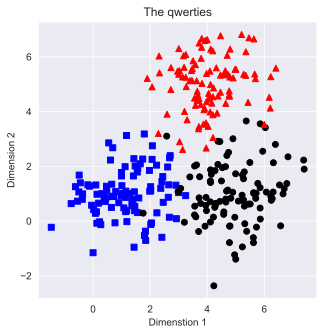

In [68]:
# create data

nPerCLuster = 100
blur = 1

A = [1,1]
B = [5,1]
C = [4,5]

a = [A[0]+ np.random.randn(nPerCLuster)*blur,A[1]+ np.random.randn(nPerCLuster)*blur]
b = [B[0]+ np.random.randn(nPerCLuster)*blur,B[1]+ np.random.randn(nPerCLuster)*blur]
c = [C[0]+ np.random.randn(nPerCLuster)*blur,C[1]+ np.random.randn(nPerCLuster)*blur]

# true label
labels_np = np.vstack((np.zeros((nPerCLuster,1)),np.ones((nPerCLuster,1)),1+np.ones((nPerCLuster,1))))
 # concatinate into a matrix
data_np = np.hstack((a,b,c)).T

# convert to pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).long()

labels = labels.reshape(300)

# plot the data
fig= plt.subplots(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.plot(data[np.where(labels==2)[0],0],data[np.where(labels==2)[0],1],'r^')
plt.title("The qwerties")
plt.xlabel("Dimenstion 1")
plt.ylabel("Dimension 2")
plt.show()

In [69]:
# model architecture
ANNMultiCls = nn.Sequential(
    nn.Linear(2,4),
    nn.ReLU(),
    nn.Linear(4,3),
    nn.Softmax(dim=1)
)

# loss function
lossFn = nn.CrossEntropyLoss() # automation compute log softmax

# optimizer
optimizer = torch.optim.SGD(ANNMultiCls.parameters(), lr=0.01)

In [70]:
# test model
yHat = ANNMultiCls(data)

print(yHat.shape)
# print(yHat)
print(labels.shape)

torch.Size([300, 3])
torch.Size([300])


In [71]:
num_ecpochs = 10000

# init losses
losses = torch.zeros(num_ecpochs)
onGoingAcc = []

for epochI in range(num_ecpochs):
    
    # forward pass
    yHat = ANNMultiCls(data)

    # compute loss
    loss = lossFn(yHat, labels)
    losses[epochI] = loss.item()
    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # compute acc
    matches = torch.argmax(yHat, dim=1)==labels
    matchesNumberic = matches.float()
    accuracyPct = 100*torch.mean(matchesNumberic)
    onGoingAcc.append(accuracyPct)
    
# final forward pass
predictions = ANNMultiCls(data)

predLabels = torch.argmax(predictions, dim=1)
totalAcc = 100*torch.mean((predLabels == labels).float())

### Visualize the results

Final ACC: 97.0%


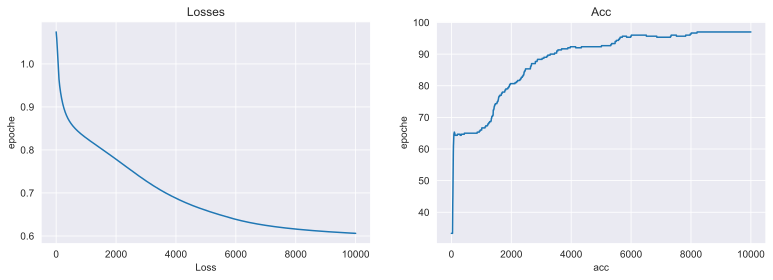

In [72]:
# report acc
print("Final ACC: {}%".format(totalAcc))

fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_xlabel("Loss")
ax[0].set_ylabel("epoche")
ax[0].set_title("Losses")

ax[1].plot(onGoingAcc)
ax[1].set_xlabel("acc")
ax[1].set_ylabel("epoche")
ax[1].set_title("Acc")
plt.show()

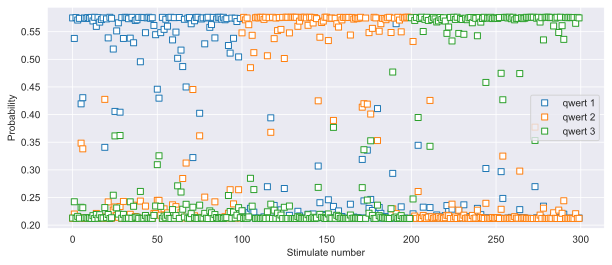

In [73]:
# plot the raw model outputs
sm = nn.Softmax(1)
fig = plt.figure(figsize=(10,4))

plt.plot(sm(yHat.detach()),'s',markerfacecolor='w')
plt.xlabel("Stimulate number")
plt.ylabel("Probability")
plt.legend(['qwert 1','qwert 2','qwert 3'])
plt.show()

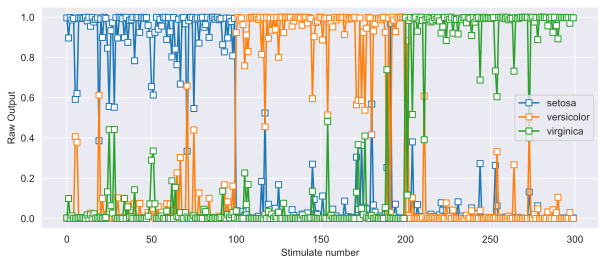

In [74]:
# plot the raw model outputs

fig = plt.figure(figsize=(10,4))

plt.plot(yHat.detach(),'s-',markerfacecolor='w')
plt.xlabel("Stimulate number")
plt.ylabel("Raw Output")
plt.legend(['setosa','versicolor','virginica'])
plt.show()